In [3]:
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.getcwd()

'/srv/mfs/hausserlab/fabio/data_analysis/notebooks'

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from src.CellAbundance import CellAbundance, join_abundance_matrices, generate_abundance_matrix
from src.utils.visualization import plot_3Dscatter_pca, plot_scatter_pca, plot_cumulative_explained_variance

In [5]:
CELL_TYPES = ['Kreatin-positive tumor', 'Treg', 'CD3-T', 'Neutrophils', 'Tumor', 'B', 
              'Macrophages', 'Mesenchymal-like', 'Other Immune', 'CD8-T', 'CD4-T', 
              'Undefined', 'Mono/Neu', 'DC/Mono', 'Endothelial', 'DC', 'NK']
patient_ids = [1, 2, 3, 4, 5]
N_SITE = 100
RADIUS = 100

abs_log_ca_list = generate_abundance_matrix(CELL_TYPES, patient_ids, N_SITE, RADIUS, method='abs', snr=1)
sites, patients_ids = join_abundance_matrices(abs_log_ca_list)

In [38]:
sites = np.array(sites)
for ct in CELL_TYPES:
    print(min(sites[:, CELL_TYPES.index(ct)]))

0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0


In [45]:
def density_plot(sites, cell_types, cell_name = 'Tumor'):
    plt.figure(figsize=(30, 10))
    
    plt.subplot(1, 3, 1)
    plt.title('Counts distribution for {}'.format(cell_name), fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.ylim(0, 1)
    plt.xlim(0, max(sites[:, cell_types.index(cell_name)]))
    
    sns.distplot(sites[:, cell_types.index(cell_name)], 
                 hist = False, kde = True, kde_kws = {'linewidth': 3, 'fill': True})
    plt.subplot(1, 3, 2)
    plt.title('Log Counts (K = 1, SNR = 1) distribution for {}'.format(cell_name), fontsize=15)
    plt.xlabel('Log Count (K = 1, SNR = 1)', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.ylim(0, 1)
    plt.xlim(0, max(np.log(sites[:, cell_types.index(cell_name)] + 1)))
    
    sns.distplot(np.log(sites[:, cell_types.index(cell_name)] + 1),
                 hist = False, kde = True, kde_kws = {'linewidth': 3, 'fill': True, 'color': 'orange'})
    plt.subplot(1, 3, 3)
    plt.title('Log Counts (K = 9, SNR = 3) distribution for {}'.format(cell_name), fontsize=15)
    plt.xlabel('Log Count (K = 9, SNR = 3)', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.ylim(0, 1)
    plt.xlim(0, max(np.log(sites[:, cell_types.index(cell_name)] + 9)))
                          
    sns.distplot(np.log(sites[:, cell_types.index(cell_name)] + 9),
                        hist = False, kde = True, kde_kws = {'linewidth': 3, 'fill': True, 'color': 'green'})



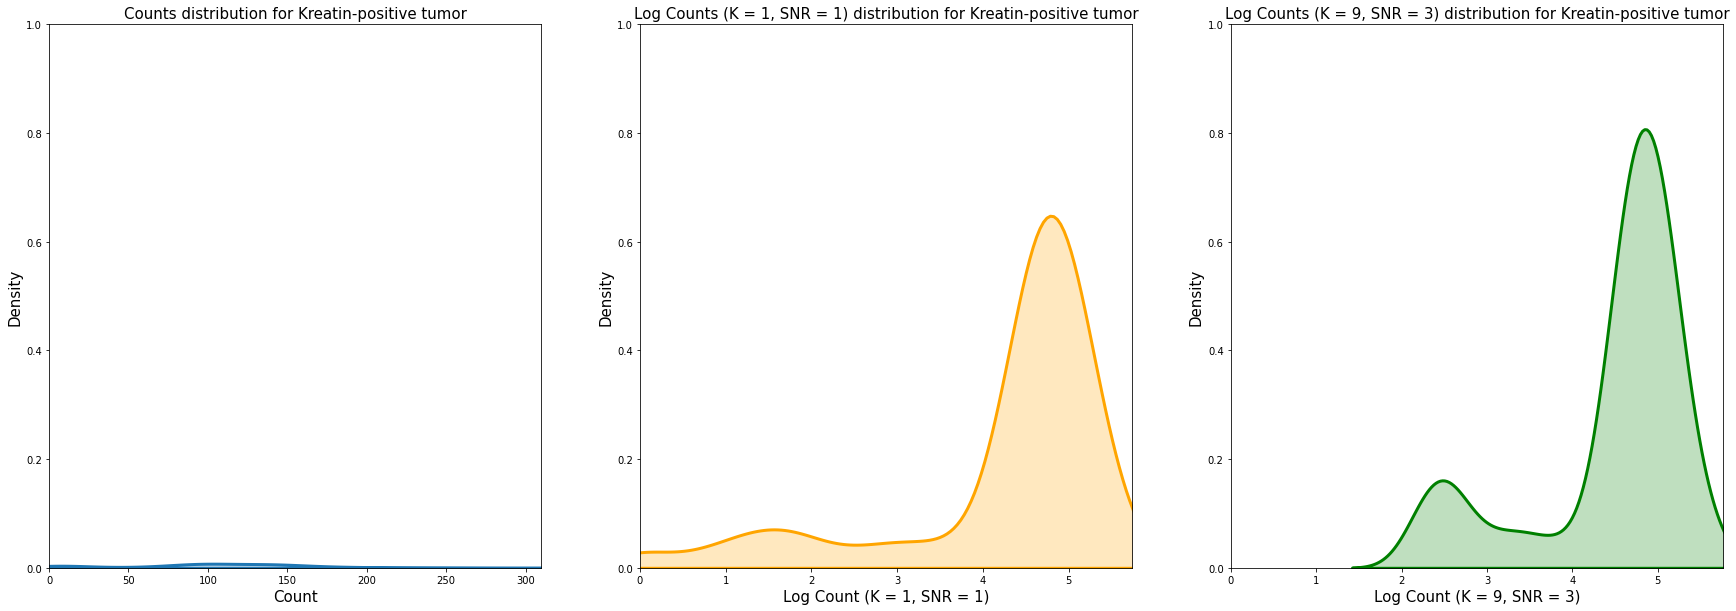

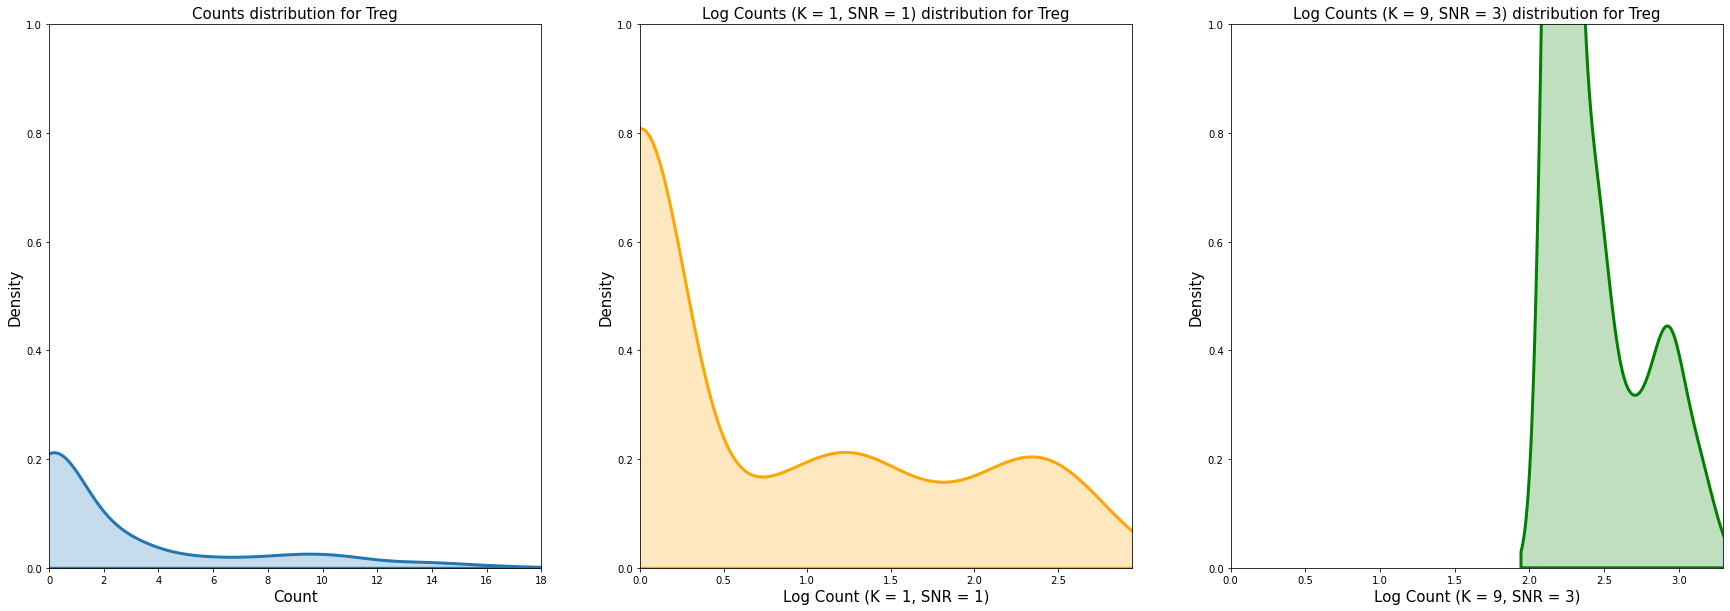

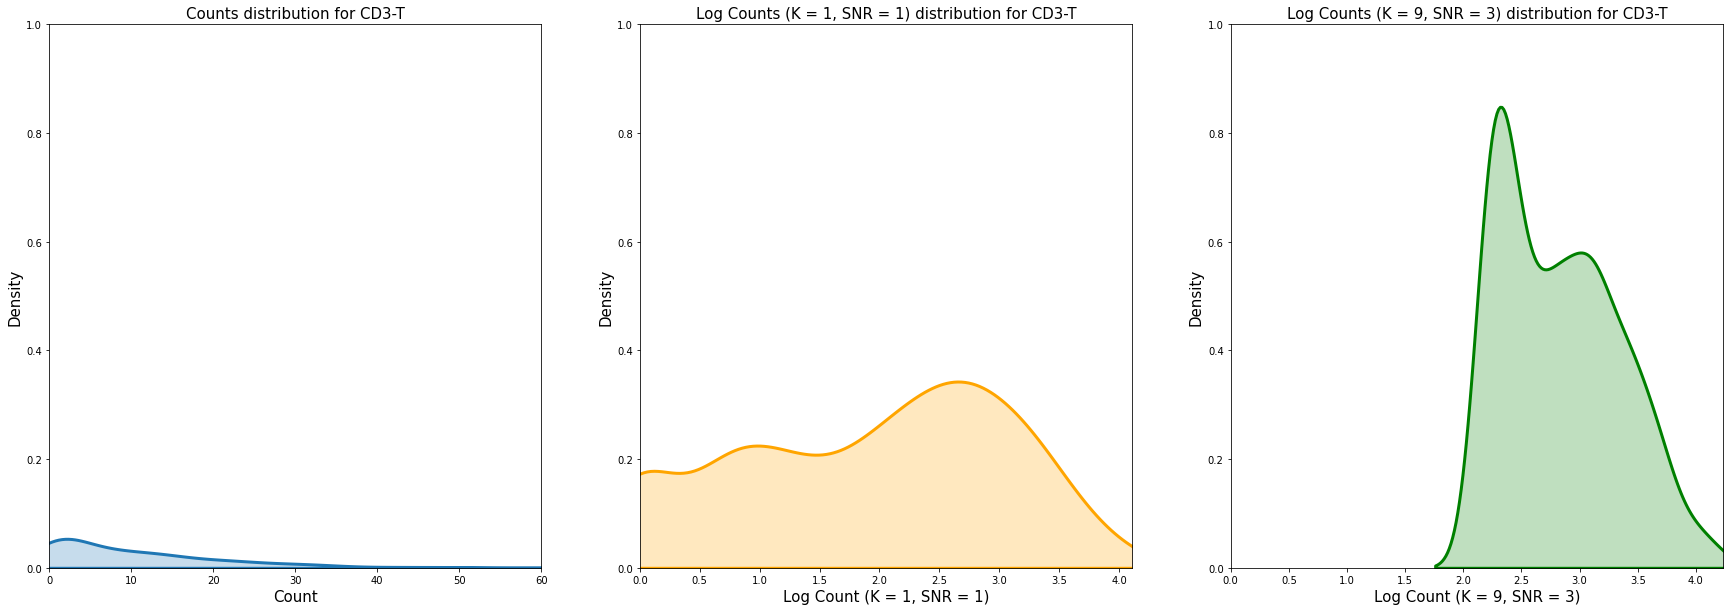

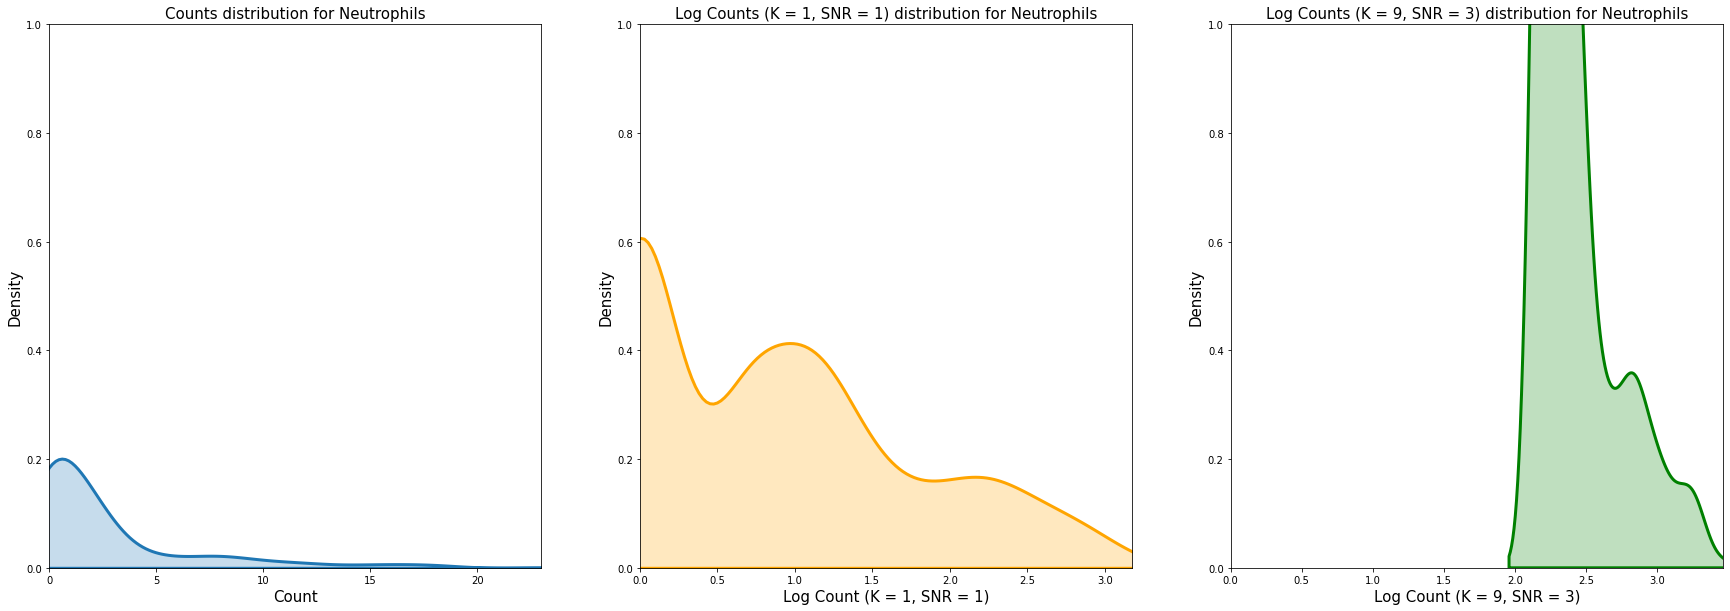

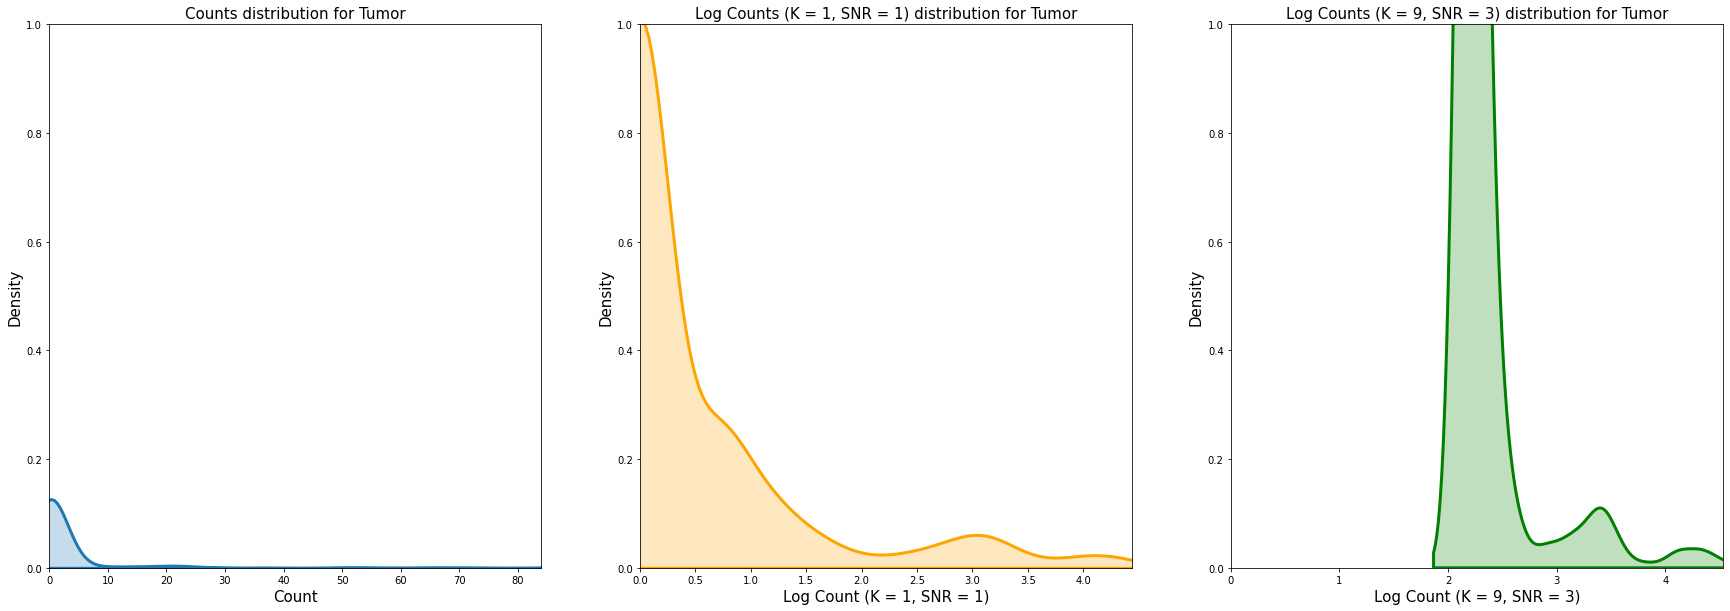

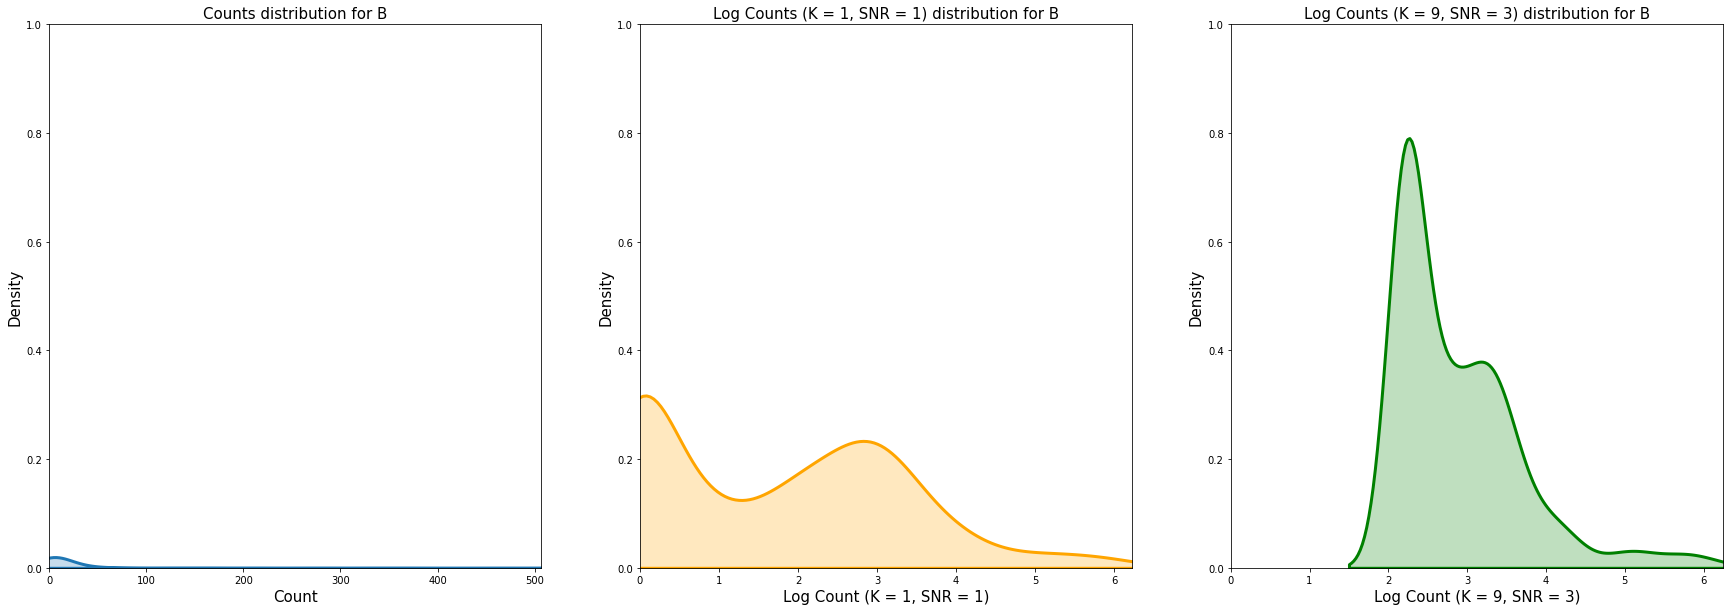

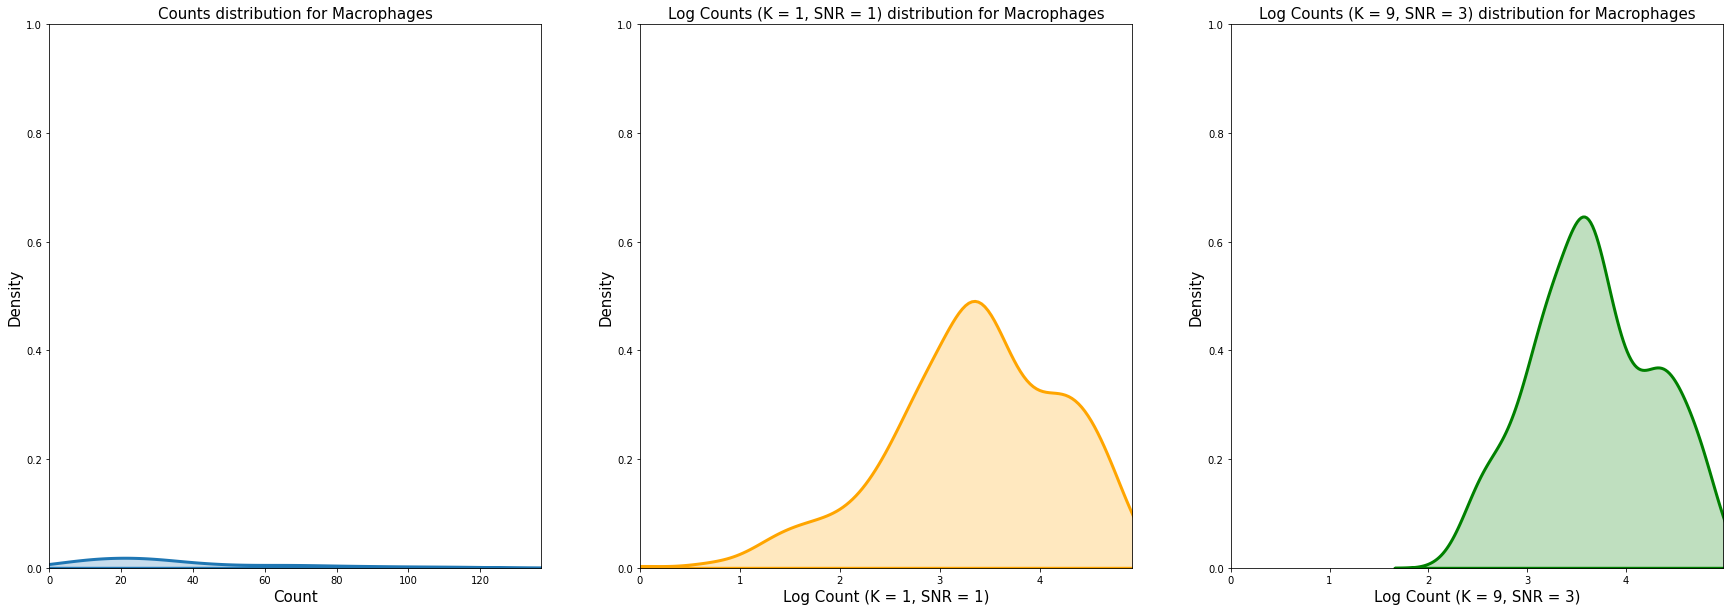

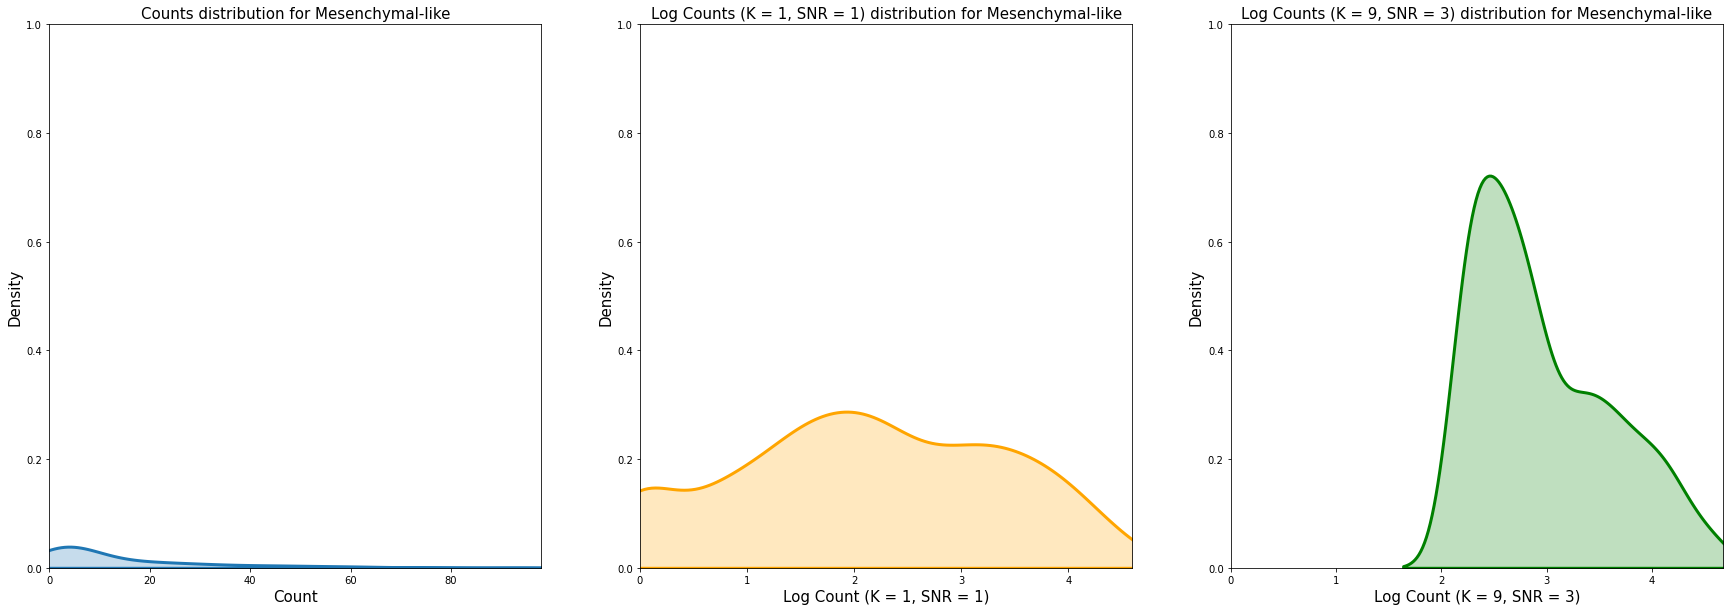

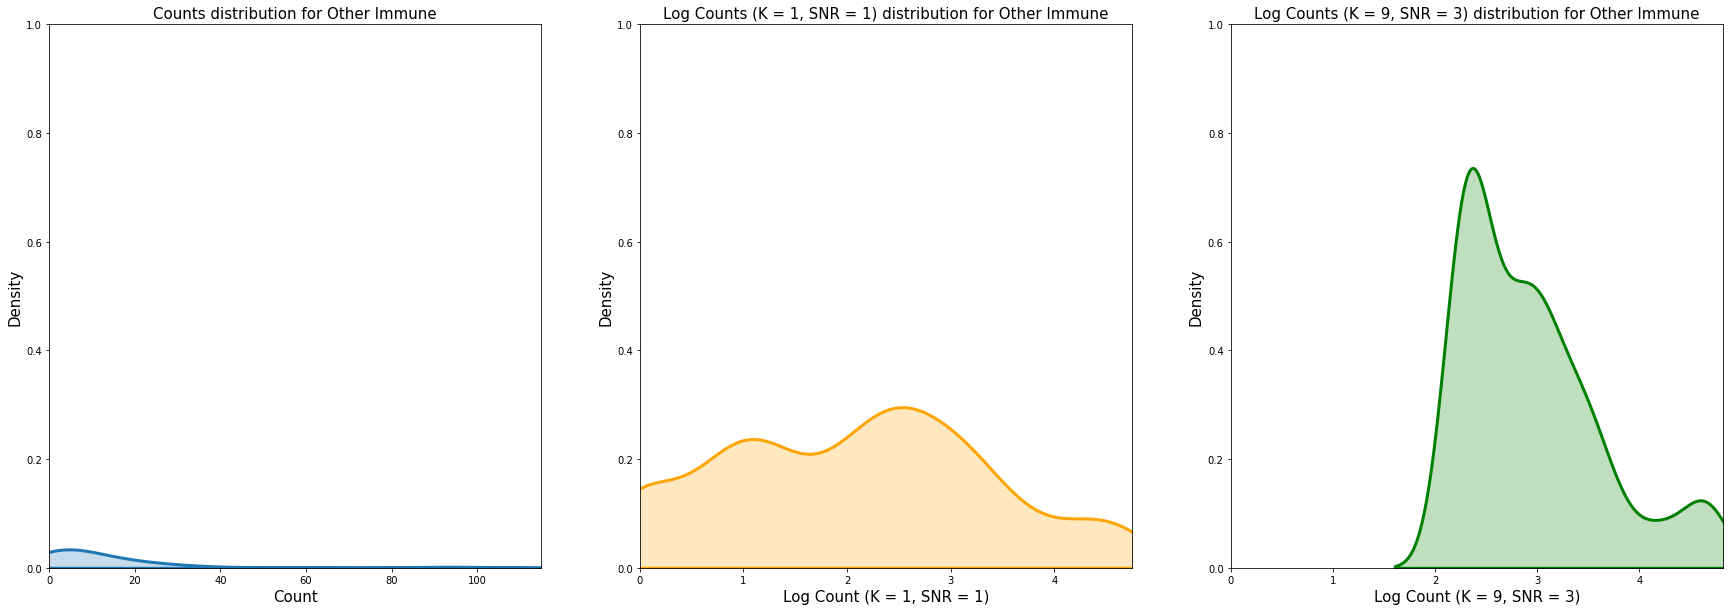

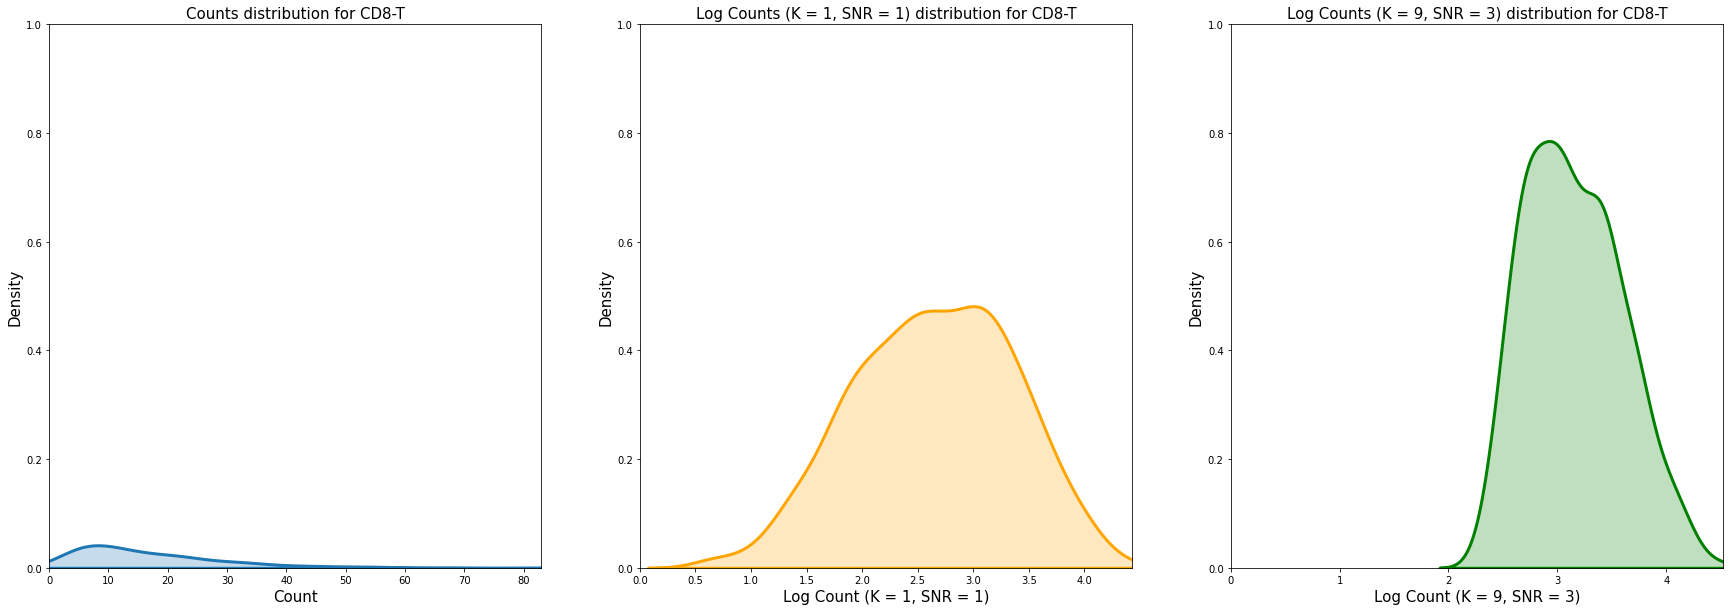

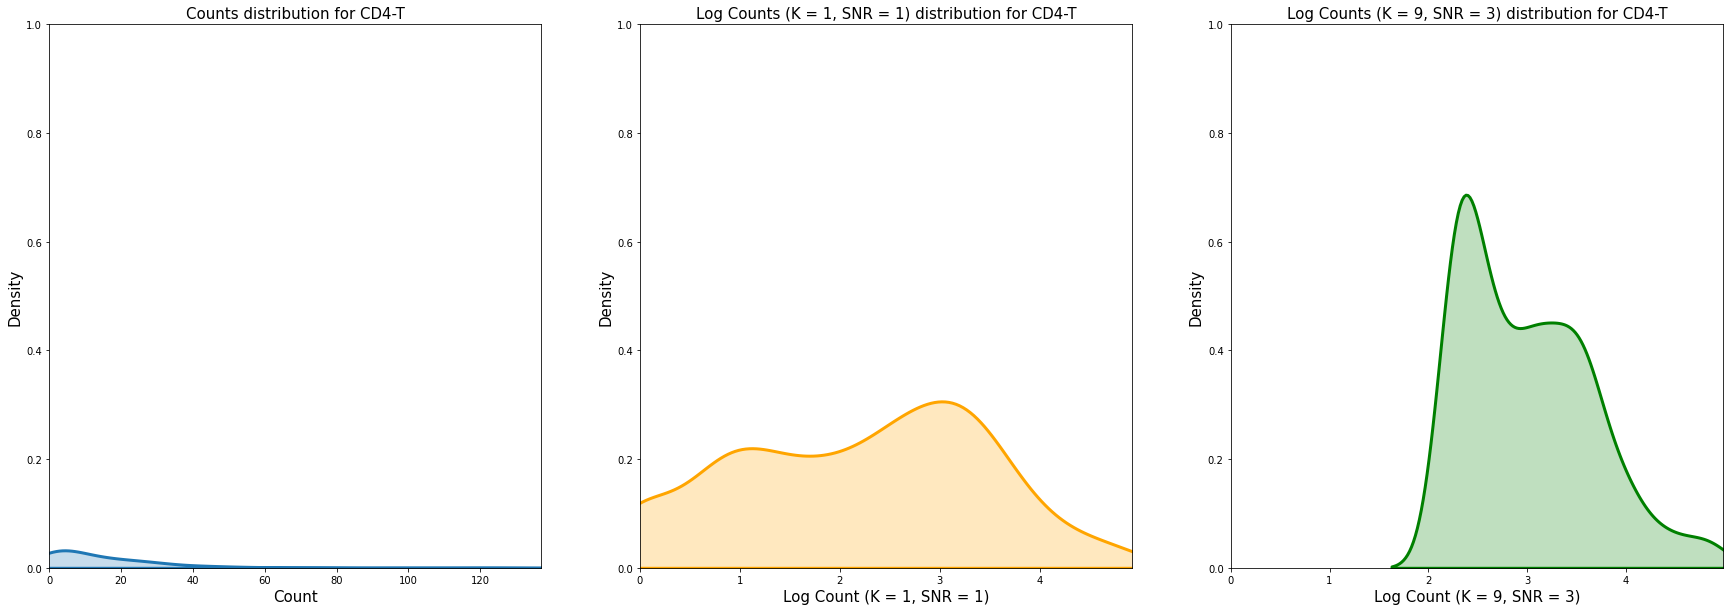

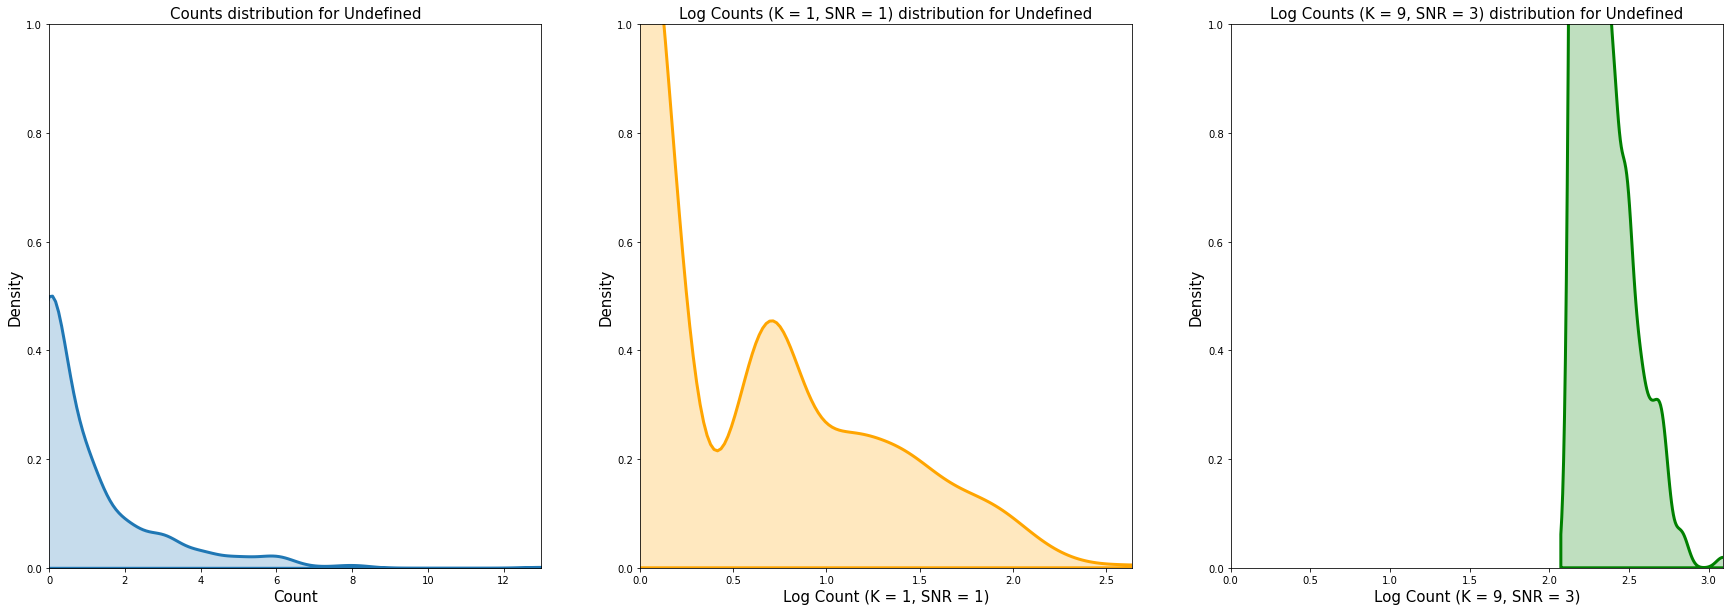

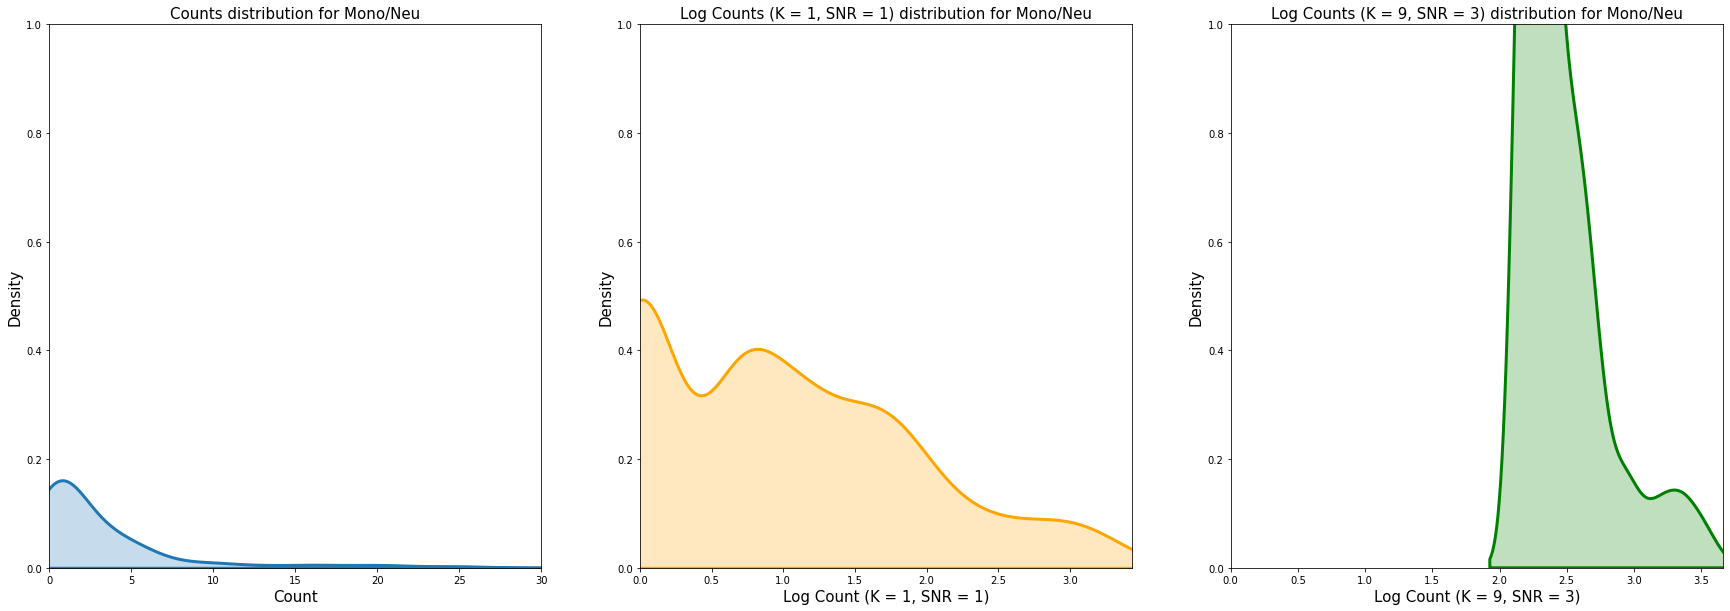

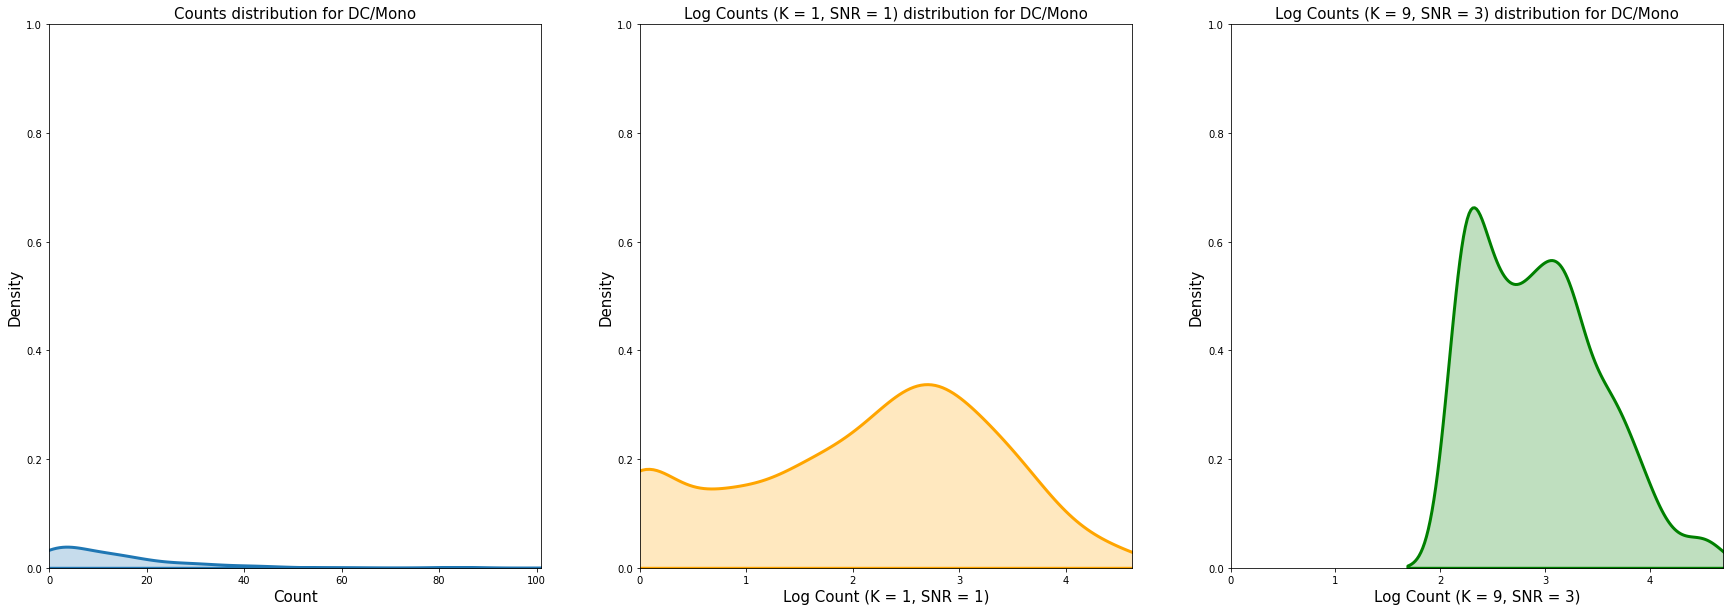

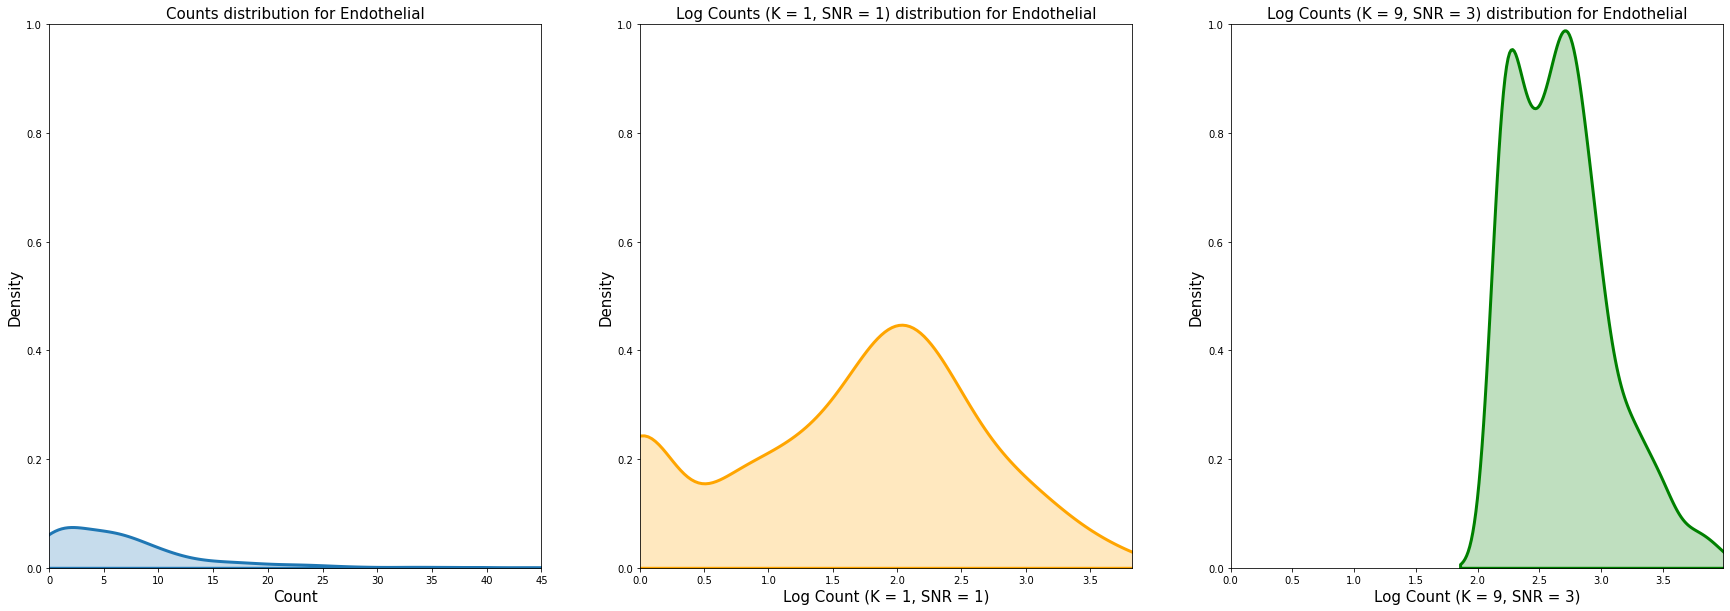

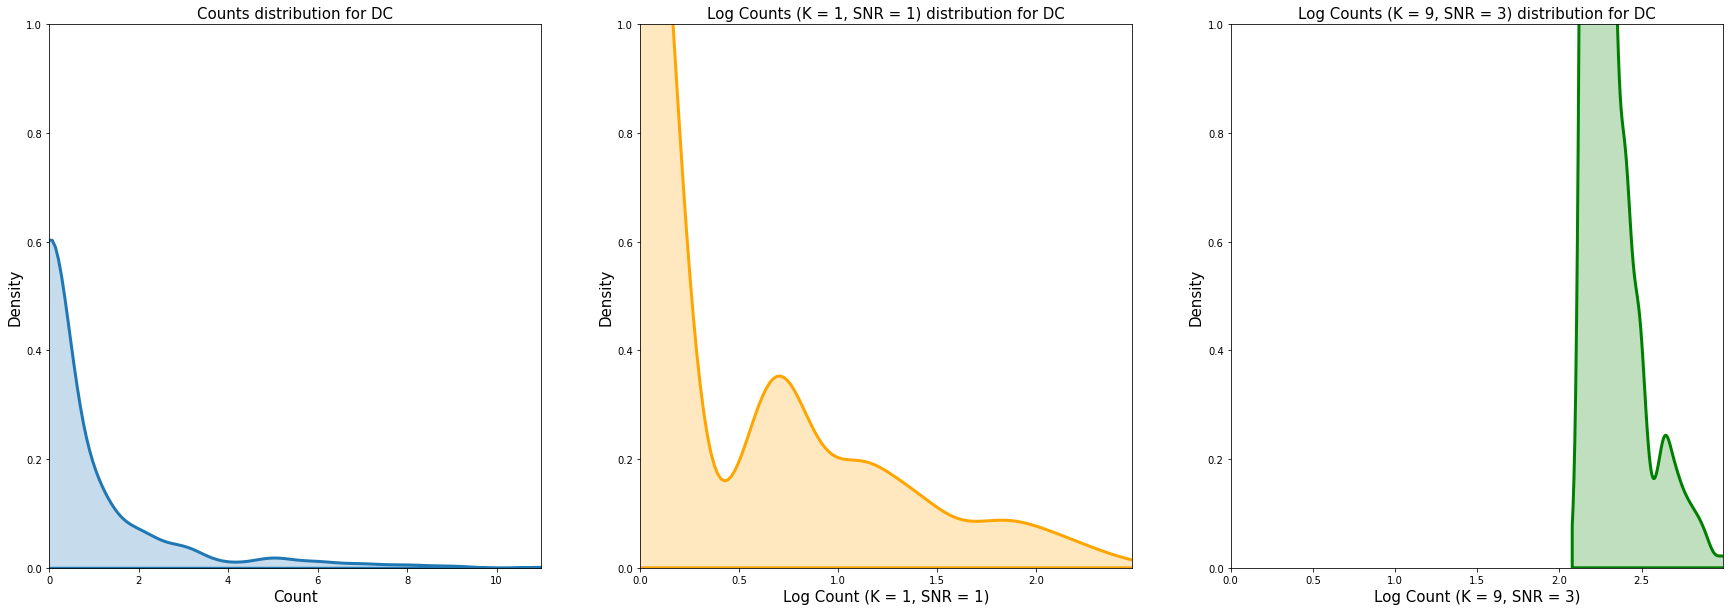

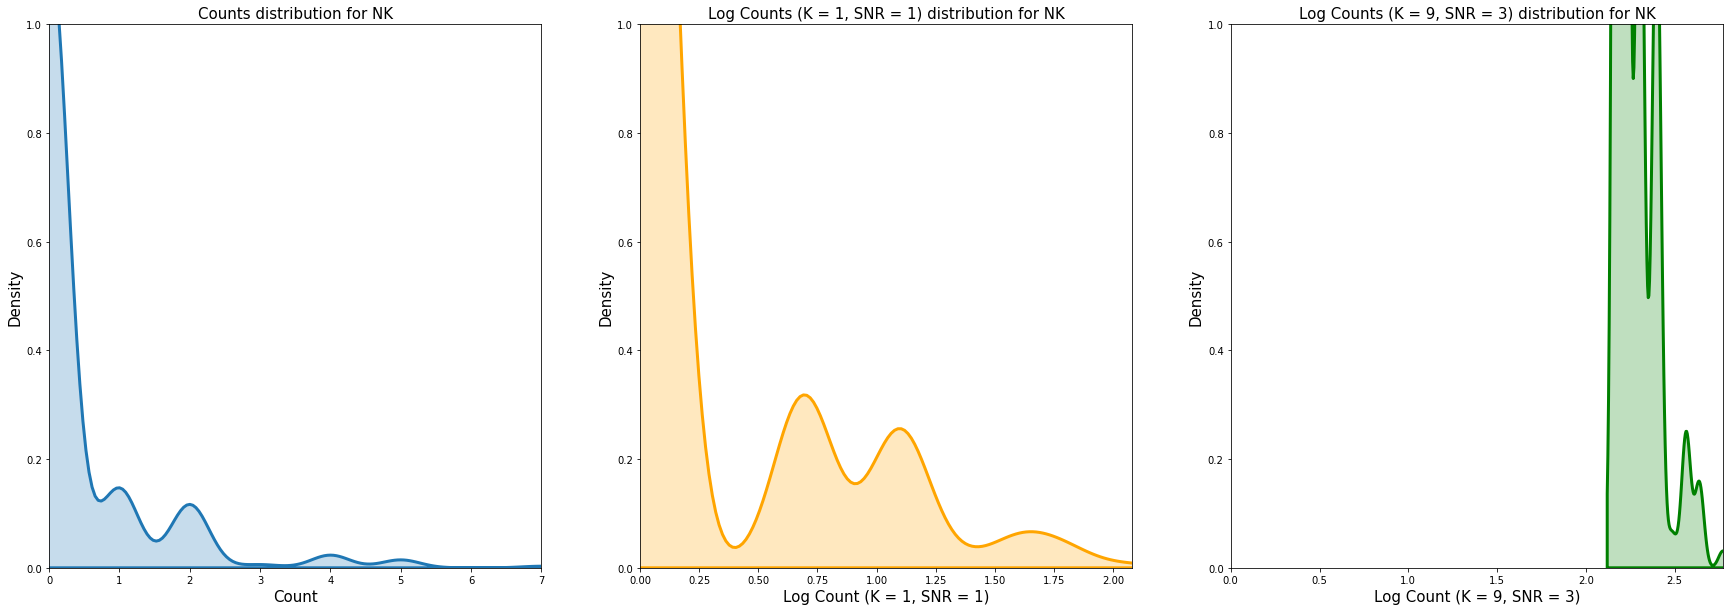

In [46]:
import warnings
warnings.simplefilter("ignore")
for ct in CELL_TYPES:
    density_plot(sites, CELL_TYPES, cell_name = ct)